In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
#path = "C:/Users/Sachith/Desktop/work_oh/different_water_density/water25/md28"

In [3]:
#f=open(path +'/input_data.dat','r')
f=open('input_data.dat','r')
lines=f.readlines()
for line in lines[0:]:
    data=line.split()
    if data[0]=='nsteps:':
        nsteps = int(data[1])
    if data[0]=='natoms:':
        natoms = int(data[1])
    if data[0]=='nonmvat:':
        nonmvat = int(data[1])
    if data[0]=='nmovingatoms:':
        nmovingatoms = int(data[1])
    if data[0]=='MDRestartFrequency:':
        MDRestartFrequency = int(data[1])
    if data[0]=='dt:':
        dt = float(data[1])
    if data[0]=='noh:':
        noh = int(data[1])
    if data[0]=='nwater:':
        nwater = int(data[1])
    if data[0]=='nox:':
        nox = int(data[1])
    if data[0]=='nhy:':
        nhy = int(data[1])
    if data[0]=='xbox:':
        xbox = float(data[1])
    if data[0]=='ybox:':
        ybox = float(data[1])
    if data[0]=='zbox:':
        zbox = float(data[1])
        
nsteps = int((nsteps/MDRestartFrequency)+1)-1
nstep = nsteps
        
print('nsteps:','  ',nstep )
print('natoms:','  ',natoms)
print('nonmvat:','  ',nonmvat)
print('nmovingatoms:','  ',nmovingatoms)
print('MDRestartFrequency:','  ',MDRestartFrequency)
print('dt:','  ',dt)
print('noh:','  ',noh)
print('nwater:','  ',nwater)
print('nox:','  ',nox)
print('nhy:','  ',nhy)
print('xbox:','  ',xbox)
print('ybox:','  ',ybox)
print('zbox:','  ',zbox)

nsteps:    970
natoms:    323
nonmvat:    261
nmovingatoms:    62
MDRestartFrequency:    10
dt:    1.0
noh:    1
nwater:    20
nox:    21
nhy:    41
xbox:    12.664
ybox:    13.3552
zbox:    40.0


In [4]:
ox = np.empty(nox,dtype=int)
hy = np.empty(nhy+1,dtype=int)
#f=open(path +'/geo_end.xyz','r')
f=open('geo_end.xyz','r')
lines=f.readlines()
jj=0
kk=0
for index, line in enumerate(lines[nonmvat+2:(natoms+2)]):
    data=line.split()
    #print(data)
    if len(data)>3:
        if data[0]=='O':
            ox[jj]=nonmvat+index+1
            jj=jj+1

        elif data[0]=='H':
            hy[kk]=nonmvat+index+1
            kk=kk+1

f.close()
print(ox)
print(hy)

[262 265 268 271 274 277 280 283 286 289 292 295 298 301 304 307 310 313
 316 319 322]
[263 264 266 267 269 270 272 273 275 276 278 279 281 282 284 285 287 288
 290 291 293 294 296 297 299 300 302 303 305 306 308 309 311 312 314 315
 317 318 320 321 323   0]


In [5]:
msd_of_oh = np.empty(nstep)
msd_of_ohx = np.empty(nstep)
msd_of_ohy = np.empty(nstep)
msd_of_ohz = np.empty(nstep)
oh_index = np.empty(nstep)
xoh = np.empty(nstep)
yoh = np.empty(nstep)
zoh = np.empty(nstep)
atom= ['Non']*(natoms)
x_ox = np.empty(nstep*nox).reshape(nox,nstep)
y_ox = np.empty(nstep*nox).reshape(nox,nstep)
z_ox = np.empty(nstep*nox).reshape(nox,nstep)

x_hy = np.empty(nstep*nhy).reshape(nhy,nstep)
y_hy = np.empty(nstep*nhy).reshape(nhy,nstep)
z_hy = np.empty(nstep*nhy).reshape(nhy,nstep)

In [6]:
jj=0
kk=0
#f=open(path +'/geo_end.xyz','r')
f=open('geo_end.xyz','r')
lines=f.readlines()
while jj < nstep:
    io=0
    ih=0
    for line in lines[kk+nonmvat+2:(kk+natoms+2)]:
        data=line.split()
        if len(data)>3:
            if data[0]=='O':
                x_ox[io][jj]=float(data[1])
                y_ox[io][jj]=float(data[2])
                z_ox[io][jj]=float(data[3])
                io = io+1
            elif data[0]=='H':
                x_hy[ih][jj]=float(data[1])
                y_hy[ih][jj]=float(data[2])
                z_hy[ih][jj]=float(data[3])
                ih = ih+1
    kk=kk+natoms+2
    jj=jj+1
f.close()

In [7]:
def distans(xo,yo,zo,xh,yh,zh):
    distan = np.sqrt((xh-xo)**2+(yh-yo)**2+(zh-zo)**2)
    #print(distan)
    return distan

In [8]:
def cal_msd(x1,y1,z1,x2,y2,z2):
    msd = np.array([0.0,0.0,0.0,0.0])
    msd[0] = ((x2-x1)**2 +(y2-y1)**2+(z2-z1)**2)
    msd[1] = (x2-x1)**2
    msd[2] = (y2-y1)**2
    msd[3] = (z2-z1)**2
    return msd

In [9]:
msd_of_o = np.empty(nstep*nox).reshape(nox,nstep)
io = 0
while io < nox :
    jj=0
    while jj < nstep :
        msd_of_ox = cal_msd(x_ox[io][0],y_ox[io][0],z_ox[io][0],x_ox[io][jj],y_ox[io][jj],z_ox[io][jj])
        msd_of_o[io][jj] = msd_of_ox[0]
        jj=jj+1
    io = io+1

In [10]:
x_ox_box = np.empty(nstep*nox).reshape(nox,nstep)
y_ox_box = np.empty(nstep*nox).reshape(nox,nstep)
z_ox_box = np.empty(nstep*nox).reshape(nox,nstep)
x_hy_box = np.empty(nstep*nhy).reshape(nhy,nstep)
y_hy_box = np.empty(nstep*nhy).reshape(nhy,nstep)
z_hy_box = np.empty(nstep*nhy).reshape(nhy,nstep)

x_ox_box = x_ox.copy()
y_ox_box = y_ox.copy()
z_ox_box = z_ox.copy()
x_hy_box = x_hy.copy()
y_hy_box = y_hy.copy()
z_hy_box = z_hy.copy()

In [11]:
# move atoms in to the box.
ijk = 1
while ijk < 2:
    print(ijk)
    ijk = ijk+1
    jj=0
    while jj < nstep:
        ii=0
        while ii < nox:
            if x_ox_box[ii][jj]>(xbox/2):
                x_ox_box[ii][jj]=x_ox_box[ii][jj]-xbox
                ijk = 1
            if x_ox_box[ii][jj]<(-xbox/2):
                x_ox_box[ii][jj]=x_ox_box[ii][jj]+xbox
                ijk = 1
            
            if y_ox_box[ii][jj]>(ybox/2):
                y_ox_box[ii][jj]=y_ox_box[ii][jj]-ybox
                ijk = 1
            if y_ox_box[ii][jj]<(-ybox/2):
                y_ox_box[ii][jj]=y_ox_box[ii][jj]+ybox
                ijk = 1
            ii=ii+1
        jj=jj+1
        
    ii=0
    jj=0
    while jj < nstep:
        ii=0
        while ii < nhy:
            if x_hy_box[ii][jj]>(xbox/2):
                x_hy_box[ii][jj]=x_hy_box[ii][jj]-xbox
                ijk = 1
            if x_hy_box[ii][jj]<(-xbox/2):
                x_hy_box[ii][jj]=x_hy_box[ii][jj]+xbox
                ijk = 1
            
            if y_hy_box[ii][jj]>(ybox/2):
                y_hy_box[ii][jj]=y_hy_box[ii][jj]-ybox
                ijk = 1
            if y_hy_box[ii][jj]<(-ybox/2):
                y_hy_box[ii][jj]=y_hy_box[ii][jj]+ybox
                ijk = 1
            ii=ii+1
        jj=jj+1
    
    
#print(x_ox[5][1000],x_ox_box[5][1000])

1
1


In [12]:
xperiodic_ox = np.append(x_ox_box,x_ox_box,axis=0) # original and 1
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box+xbox),axis=0) #2
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box+xbox),axis=0) #3
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box+xbox),axis=0) #4
xperiodic_ox = np.append(xperiodic_ox,x_ox_box,axis=0)  #5
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box-xbox),axis=0) #6
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box-xbox),axis=0) #7
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box-xbox),axis=0) #8

yperiodic_ox = np.append(y_ox_box,(y_ox_box+ybox),axis=0) # original and 1
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box+ybox),axis=0) #2
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box),axis=0) #3
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box-ybox),axis=0) #4
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box-ybox),axis=0) #5
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box-ybox),axis=0) #6
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box),axis=0) #7
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box+ybox),axis=0) #8

zperiodic_ox = (z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box)
zperiodic_ox = np.concatenate(zperiodic_ox)

periodic_ox=(ox,ox,ox,ox,ox,ox,ox,ox,ox)
periodic_ox=np.concatenate(periodic_ox)

In [13]:
def water(xo,yo,zo,xh,yh,zh,hy,periodic_ox,nox,nhy):
    jj=0
    rij= np.empty(nhy*nox*9).reshape(nhy,nox*9)
    while jj < nhy:
        ii=0
        while ii < (nox*9):
            rij[jj][ii]=distans(xo[ii],yo[ii],zo[ii],xh[jj],yh[jj],zh[jj])
            ii = ii+1
        jj = jj+1
        
    hoatm = np.empty(nhy*2,dtype=int).reshape(nhy,2)
    wht = np.empty(nox*6,dtype=int).reshape(nox,6)
    hoatm[:][:]=0
    wht[:][:]=0
    j=0 
    while j<nhy:#go over H 
        hh = rij[j][0]
        hoatm[j][0] = hy[j]
        hoatm[j][1] = periodic_ox[0]
        i=1
        while i<(nox*9): #go over in periodic box
            if rij[j][i]<hh: #find shotest bond
                hoatm[j][1] = periodic_ox[i]
                hh = rij[j][i]
            i=i+1
        j=j+1
    nn=0
    while nn<nox:
        wht[nn][0]= periodic_ox[nn]
        mm=0
        kk=1
        while mm<nhy:
            if hoatm[mm][1]==periodic_ox[nn]:
                wht[nn][kk] = hoatm[mm][0]
                kk=kk+1
            mm=mm+1
        nn=nn+1
    return wht

In [14]:
def closesO(xoo,yoo,zoo,joh):
    clo=[0.0,0.0]
    x0=xoo[joh]
    y0=yoo[joh]
    z0=zoo[joh]
    ll=0
    ddold=100.0
    while (ll<len(xoo)):
        if ll != joh:
            dx= xoo[ll]-x0
            dy= yoo[ll]-y0
            dz= zoo[ll]-z0
            dd =dx**2+dy**2+dz**2
            if dd<ddold:
                ddold=dd
                clo[0] = ll
                clo[1]= np.sqrt(ddold)
        ll=ll+1
    return clo

In [15]:
#ff=open(path +'/errors2.dat','w')
ff=open('errors2.dat','w')
def find_oh(wht,nox):
    wht=wht.astype(int)
    nn=0
    more_oh = 0
    iioh=1
    while nn<nox:
        if wht[nn][2]==0:
            iioh = wht[nn][0]
            more_oh = more_oh+1
        if more_oh>1:
            print('morre than one oh')
            print('morre than one oh',file =ff)
        if wht[nn][1]==0:
            print('O atom found')
            print('O atom found',file =ff)
        if wht[nn][3]>0:
            print('H3O+ found')
            print('H3O+ found',file =ff)
        nn=nn+1
    return iioh

In [16]:
ll=0
diso=[]
ioo=[]
while ll<nstep:
    xo = [sub[ll] for sub in xperiodic_ox]
    yo = [sub[ll] for sub in yperiodic_ox]
    zo = [sub[ll] for sub in zperiodic_ox]
    xh = [sub[ll] for sub in x_hy_box]
    yh = [sub[ll] for sub in y_hy_box]
    zh = [sub[ll] for sub in z_hy_box]
    
    wht = water(xo,yo,zo,xh,yh,zh,hy,periodic_ox,nox,nhy)
    ioh = find_oh(wht,nox)
    koh,=np.where(ox == ioh)
    joh=koh[0]
    if ll==0:
        xoh0 = x_ox[joh][0]
        yoh0 = y_ox[joh][0]
        zoh0 = z_ox[joh][0]
        x_old = x_ox[joh][ll]
        y_old = y_ox[joh][ll]
    
    xmv = 'no'
    ymv = 'no'

    
    if abs(x_ox[joh][ll]-x_old)>5: # atom need to be moved in x
        if x_ox[joh][ll]>x_old:
            x_ox[joh][ll] = x_ox[joh][ll]-xbox
            xmv = 'ne_x'
            #print('atom moved in negative x')
        elif x_ox[joh][ll]<x_old:
            x_ox[joh][ll] = x_ox[joh][ll]+xbox
            xmv = 'po_x'
            #print('atom moved in positive x')
            
    if abs(y_ox[joh][ll]-y_old)>5: # atom need to be moved in y
        if y_ox[joh][ll]>y_old:
            y_ox[joh][ll] = y_ox[joh][ll]-ybox
            ymv = 'ne_y'
            #print('atom moved in negative y')
        elif y_ox[joh][ll]<y_old:
            y_ox[joh][ll] = y_ox[joh][ll]+ybox
            ymv = 'po_y'
            #print('atom moved in positive y')
            
  
    x_old = x_ox[joh][ll]
    y_old = y_ox[joh][ll]
    
    xoh[ll] = x_ox[joh][ll]
    yoh[ll] = y_ox[joh][ll]
    zoh[ll] = z_ox[joh][ll]

    oh_index[ll] = ioh
    
    xoo = [sub[ll] for sub in xperiodic_ox]
    yoo = [sub[ll] for sub in yperiodic_ox]
    zoo = [sub[ll] for sub in zperiodic_ox]
    #print('joh  =  ',joh,'            ',xoo[joh] )
    coslo = closesO(xoo,yoo,zoo,joh)
    #print(len(xoo))
    jo =int(coslo[0])
    ioo.append(periodic_ox[jo])
    #print(jo,periodic_ox)
    jo,=np.where(ox==periodic_ox[jo])[0]
    #print('gh',ox[joj],periodic_ox[jo],joj)
    #print(xo[joj])
    
    diso.append(coslo[1])
    
      
    #print('{:<8d}'.format(ll),'{:<5d}'.format(ioh),'{:<6d}'.format(joh),'{0: >#012.8f}'.format(x_ox[joh][ll]),'{0: >#012.8f}'.format(y_ox[joh][ll]),'{0: >#012.8f}'.format(z_ox[joh][ll]),xmv ,ymv,'{:<5d}'.format(ioo[ll]),'{0: >#012.8f}'.format(x_ox_box[jo][ll]),'{0: >#012.8f}'.format(y_ox_box[jo][ll]),'{:<5d}'.format(jo),'{0: >#012.8f}'.format(diso[ll]) )

    ll=ll+1

In [17]:
#f=open(path +'/oh_to_o_dis.dat','w')
f=open('oh_to_o_dis.dat','w')
ll=0
while ll<nstep:
    print('{:<6d}'.format(ll),'{:<6d}'.format(int(oh_index[ll])),'{:<6d}'.format(int(ioo[ll])),'{0: >#016.8f}'.format(diso[ll]),file =f)  
    ll = ll+1
    
f.close()

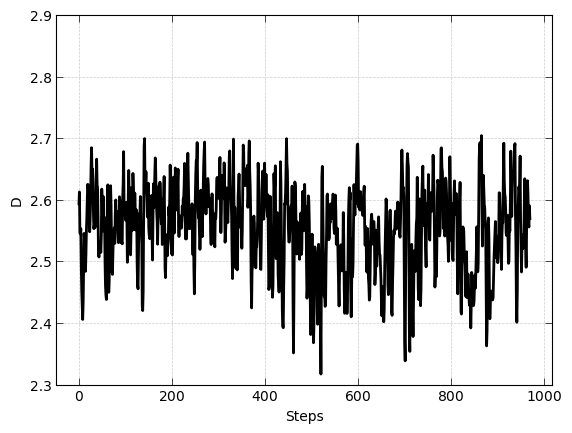

In [18]:
plt.figure()
plt.plot(diso[:],color='k',linewidth=2)
plt.xlabel('Steps')
plt.ylabel('D')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
plt.ylim([2.3,2.9])
#plt.xlim([7200,7400])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.savefig('closest_oxygen_dis.jpg', dpi=400)

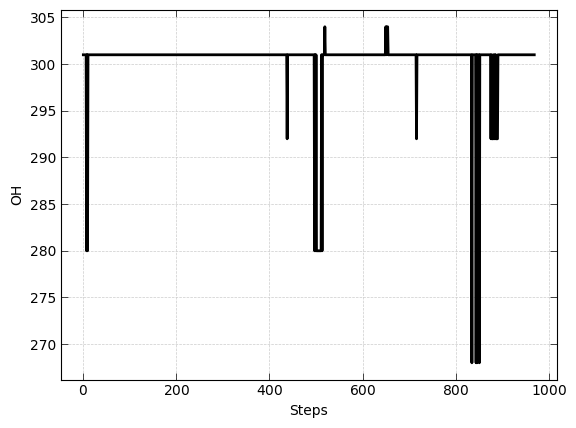

In [19]:
plt.figure()
plt.plot(oh_index[:],color='k',linewidth=2)
plt.xlabel('Steps')
plt.ylabel('OH')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
#plt.ylim([0,50])
#plt.xlim([7200,7400])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.savefig('oh_index_with_rataling.jpg', dpi=400)